In [12]:
#전처리 규칙 - 수작업 달인 될듯^^..
dic = {
"#@인간및인간집단.인물.방송인.여성#" : "여성 방송인",
"#@인간및인간집단.인물.방송인.남성#" : "남성 방송인",
"#@인간및인간집단.인물.정치인.남성#" : "남성 정치인",
"#@인간및인간집단.인물.정치인.여성#" : "여성 정치인",
"#@인간및인간집단.인물.인물_무정보.남성#" : "무정보 남성",
"#@인간및인간집단.인물.인물_무정보.여성#" : "무정보 여성",
"#@인간및인간집단.인물.체육인.남성#" : "남성 체육인",
"#@인간및인간집단.인물.체육인.여성#" : "여성 체육인",
"#@인간및인간집단.인물.문학인.남성#" : "남성 문학인",
"#@인간및인간집단.인물.문학인.여성#" : "여성 문학인",
"#@인간및인간집단.인물.미술인.남성#" : "남성 미술인",
"#@인간및인간집단.인물.미술인.여성#" : "여성 미술인",
"#@인간및인간집단.인물.영화감독.남성#" : "남성 체육인",
"#@인간및인간집단.인물.음악인.남성#" : "남성 음악인",
"#@인간및인간집단.인물.종교인.남성#" : "남성 종교인",
"#@인간및인간집단.조직및단체.가수그룹.남성" : "남성 가수그룹",
"#@인간및인간집단.조직및단체.가수그룹.여성" : "여성 가수그룹",
"#@인간및인간집단.조직및단체.가수그룹.혼성" : "혼성 가수그룹",
"#@인간및인간집단.조직및단체.가수팬덤#" : "가수팬덤",
"#@인간및인간집단.인물.경제인.남성#" : "남성 경제인",
"#@인간및인간집단.인물.경제인.여성#" : "여성 경제인",
"#@인간및인간집단.인물.언론인.남성#" : "남성 언론인",
"#@인간및인간집단.인물.언론인.여성#" : "여성 언론인",
"#@인간및인간집단.인물.범죄자.남성#" : "남성 범죄자",
"#@인간및인간집단.조직및단체.기업#" : "기업",
"#@인간및인간집단.조직및단체.교육기관#" : "교육기관",
"#@인간및인간집단.조직및단체.정당#" : "정당",
"#@인간및인간집단.조직및단체.연예기획사" : "연예기획사",
"#@인간및인간집단.조직및단체.언론기관#" : "언론기관",
"#@인간및인간집단.조직및단체.연구기관#" : "연구기관",
"#@인간및인간집단.조직및단체.종합병원#" : "종합병원",
"#@인간및인간집단.조직및단체.관청#" : "관청",
"#@인간및인간집단.조직및단체.동맹#" : "동맹",
"#@인간및인간집단.조직및단체.댄스그룹#" : "댄스그룹",
"#@인간및인간집단.조직및단체.게임팀#" : "게임팀",
"#@인간및인간집단.조직및단체.운동팀#" : "운동팀",
"#@인간및인간집단.조직및단체.정치팬덤#" : "정치팬덤",
"#@인간및인간집단.조직및단체.기타단체#" : "기타단체",
"#@물질적산물.교통수단.자동차#" : "자동차",
"#@물질적산물.상품.가전제품#" : "가전제품",
"#@물질적산물.상품.게임#" : "게임",
"#@물질적산물.상품.식품#" : "식품",
"#@물질적산물.상품.배달서비스#" : "배달서비스",
}

#텍스트에 dic의 key 중에 하나있는 지 검사하기 위한 list 
lst = list(dic.keys())

In [15]:
#전처리 과정을 함수로 작성 -> 한 번  돌릴 때  2~30분 걸릴 수 있음, 현재 코드는 수정해야함 -> 파일에 치환 안되는 원인 파악 우선 
def preprocessing(path,file_name) :
    import pandas as pd
    import chardet
    from tqdm import tqdm
    #위에서 설정한 dic과 lst 불러오기 
    global dic
    global lst
    
    #신경 안써도 되는 부분 - 인코딩 방법이 무엇인지 찾아주기 위한 과정 
    rawdata = open(path, 'rb').read()
    result = chardet.detect(rawdata)
    charenc = result['encoding']
    charenc

    #데이터 프레임으로 파일 불러와서 text부분에 개체어 사용되었는 지 검사하고, 만약 있다면 개체어를 치환어로 바꿔주는 작업 
    df  = pd.read_csv(path,encoding=charenc)
    txt = df['text']
    for j in tqdm(txt) :
        #치환시 필요한 문장의 인덱스 얻기 -> 새로운 문장이 들어가야 하는 위치를 지정해주기 위함
        ind = df.index[(df['text']=='j')]  

        for i in lst :
            #데이터 프레임 문장 j에 i 개체어가 사용되어있다면, 
            if i in j : 
                #개체어를 치환어로 바꾸기 (replace 사용하면 문장 속 단어가 교체됨 )
                new = j.replace(i,dic[i])
                #치환된 문장을 원래 데이터 프레임 속의 지정된 인덱스에 넣기
                df.loc[ind,'text'] = new
                
    #작업 후 csv 파일 생성, file name은 train, test 등 분리하기 위함 -> 파일은 잘 만들어지는데, 개체어 치환이 적용이 안되어있음. 이 부분 확인해야함.
    df.to_csv("전처리완료{0}".format(file_name))

In [16]:
#실제 파일 돌리기, path는 내 pc 내의 파일 경로 복사해서 붙여넣기
path = "/Users/idayeon/Desktop/인공지능학부연구생/논문 작성 step/데이터 전처리/train,text data 전처리/train.csv"
file_name = "train"
preprocessing(path,file_name)

100%|██████████| 195915/195915 [24:48<00:00, 131.58it/s]


In [47]:
import pandas as pd
df = pd.read_csv("/Users/idayeon/Desktop/인공지능학부연구생/논문 작성 step/명사활용하세요.csv", sep=",")
df[df['tag']=='CV_POSITION']['noun'].value_counts()

장애인       706
한녀        169
노예        161
여사         97
난민         97
         ... 
여성 범죄자      1
몰카범죄자       1
모태솔로        1
명예짱깨        1
K-페미전사      1
Name: noun, Length: 798, dtype: int64

([<matplotlib.patches.Wedge at 0x1378136a0>,
 [Text(0.5623317167796028, 0.9454009944482314, 'women'),
  Text(-1.08116237066143, 0.20270157440374548, 'disability'),
  Text(-0.3914741942277983, -1.0279824683591137, 'tribe/country'),
  Text(0.4030218422098047, -1.023510329553061, 'men'),
  Text(0.8090755204914553, -0.7452494898632813, 'local'),
  Text(0.995591296021304, -0.46775845399802285, 'economy'),
  Text(1.0610250991052923, -0.2902167105261252, 'age'),
  Text(1.0897019451899268, -0.1501654775548969, 'studylevel'),
  Text(1.0975288329606332, -0.07369166045130879, 'religion'),
  Text(1.0996598889562108, -0.027351939982644624, 'transgender'),
  Text(1.0999943942474035, -0.003511783633465977, 'etc')],
 [Text(0.3067263909706924, 0.5156732696990353, '32.9%'),
  Text(-0.589724929451689, 0.1105644951293157, '28.3%'),
  Text(-0.21353137866970812, -0.560717710014062, '16.1%'),
  Text(0.21983009575080256, -0.5582783615743968, '7.5%'),
  Text(0.44131392026806643, -0.40649972174360793, '6.9%'),


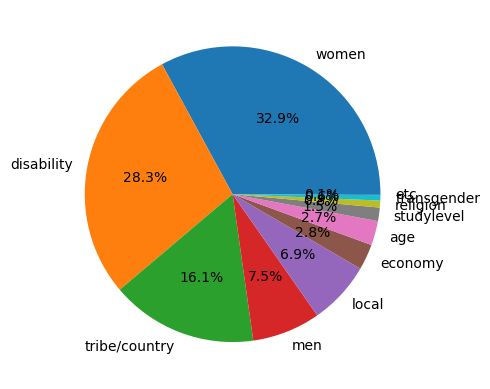

In [3]:
import matplotlib.pyplot as plt
lst = [6155,5284,3002,1396,1290,526,499,275,141,110,19]
labels = ['women','disability','tribe/country','men','local','economy','age','studylevel','religion','transgender','etc']
plt.pie(lst, labels=labels,autopct='%.1f%%')